In [114]:
pip install plotly

ERROR: Exception:
Traceback (most recent call last):
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 189, in _main
    status = self.run(options, args)
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/req_command.py", line 178, in wrapper
    return func(self, options, args)
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/install.py", line 276, in run
    wheel_cache = WheelCache(options.cache_dir, options.format_control)
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cache.py", line 244, in __init__
    self._ephem_cache = EphemWheelCache(format_control)
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/cache.py", line 215, in __init__
    self._temp_dir = TempDirectory(
  File "/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/pip/_internal/utils/temp_dir.py", line 139, in __

In [235]:
pip install dash

     |████████████████████████████████| 8.5 MB 3.0 MB/s eta 0:00:01     |███████▏                        | 1.9 MB 3.0 MB/s eta 0:00:03
     |████████████████████████████████| 421 kB 13.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# LOAD LIBRARIES

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


# LOAD DATASET

In [76]:
TeenBirthRates = pd.read_csv("Teen rates by state.csv")

In [77]:
TeenBirthRates.head()

,YEAR,STATE,RATE,URL
0,2020,AL,24.8,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,17.7,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,16.6,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,27.8,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,11.0,/nchs/pressroom/states/california/ca.htm


In [78]:
TeenBirthRates.tail()

,YEAR,STATE,RATE,URL
395,2005,VA,34.4,/nchs/pressroom/states/virginia/virginia.htm
396,2005,WA,31.1,/nchs/pressroom/states/washington/washington.htm
397,2005,WV,43.4,/nchs/pressroom/states/westvirginia/westvirgin...
398,2005,WI,30.3,/nchs/pressroom/states/wisconsin/wisconsin.htm
399,2005,WY,43.2,/nchs/pressroom/states/wyoming/wyoming.htm


### WRANGLE THE DATA

In [79]:
TeenBirthRates.drop("URL", axis = 1, inplace=True)

In [80]:
TeenBirthRates = TeenBirthRates[TeenBirthRates.YEAR != 2005]

In [81]:
TeenBirthRates.rename(columns={'STATE' : 'STATECODE'}, inplace=True)

In [82]:
TeenBirthRates.head()

,YEAR,STATECODE,RATE
0,2020,AL,24.8
1,2020,AK,17.7
2,2020,AZ,16.6
3,2020,AR,27.8
4,2020,CA,11.0


In [83]:
TeenBirthRates.YEAR.describe()

count     350.000000
mean     2017.000000
std         2.002863
min      2014.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2020.000000
Name: YEAR, dtype: float64

### LOOK AT THE TREND IN 2014

In [84]:
###Filter by the year 2014
TeenBirthRates2014 = TeenBirthRates[TeenBirthRates.YEAR == 2014]

In [85]:
TeenBirthRates2014

,YEAR,STATECODE,RATE
300,2014,AL,32.0
301,2014,AK,27.8
302,2014,AZ,29.9
303,2014,AR,39.5
304,2014,CA,21.1
305,2014,CO,20.3
306,2014,CT,11.5
307,2014,DE,20.7
308,2014,FL,22.5
309,2014,GA,28.4


In [86]:
TeenBirthRates2014 = TeenBirthRates2014.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc= np.mean))

TeenBirthRates2014

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,27.8,27.8,27.8
1,AL,32.0,32.0,32.0
2,AR,39.5,39.5,39.5
3,AZ,29.9,29.9,29.9
4,CA,21.1,21.1,21.1
5,CO,20.3,20.3,20.3
6,CT,11.5,11.5,11.5
7,DE,20.7,20.7,20.7
8,FL,22.5,22.5,22.5
9,GA,28.4,28.4,28.4


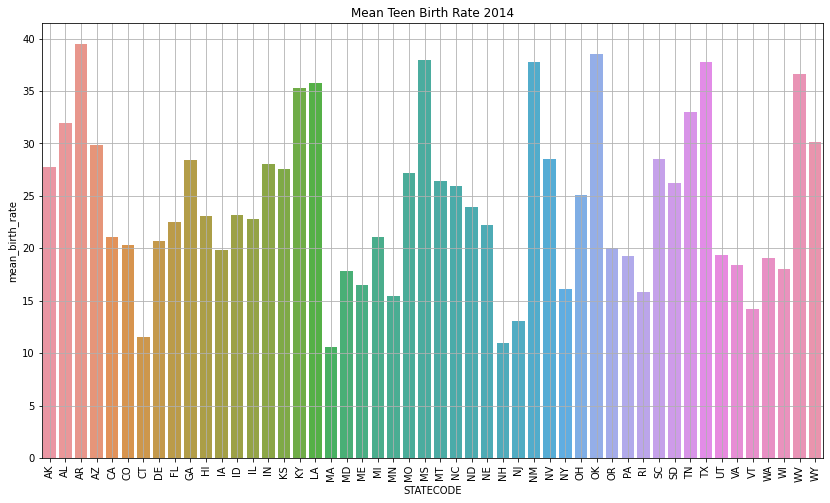

In [125]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2014.STATECODE, y = TeenBirthRates2014.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2014')
plt.show()

In [87]:
state_abbreviations = {
    'AL': 'ALABAMA',
    'AK': 'ALASKA',
    'AS': 'AMERICAN SAMOA',
    'AZ': 'ARIZONA',
    'AR': 'ARKANSAS',
    'CA': 'CALIFORNIA',
    'CO': 'COLORADO',
    'CT': 'CONNECTICUT',
    'DE': 'DELAWARE',
    'DC': 'DISTRICT OF COLUMBIA',
    'FL': 'FLORIDA',
    'GA': 'GEORGIA',
    'GU': 'GUAM',
    'HI': 'HAWAII',
    'ID': 'IDAHO',
    'IL': 'ILLINOIS',
    'IN': 'INDIANA',
    'IA': 'IOWA',
    'KS': 'KANSAS',
    'KY': 'KENTUCKY',
    'LA': 'LOUISIANA',
    'ME': 'MAINE',
    'MD': 'MARYLAND',
    'MA': 'MASSACHUSETTS',
    'MI': 'MICHIGAN',
    'MN': 'MINNESOTA',
    'MS': 'MISSISSIPPI',
    'MO': 'MISSOURI',
    'MT': 'MONTANA',
    'NE': 'NEBRASKA',
    'NV': 'NEVADA',
    'NH': 'NEW HAMPSHIRE',
    'NJ': 'NEW JERSEY',
    'NM': 'NEW MEXICO',
    'NY': 'NEW YORK',
    'NC': 'NORTH CAROLINA',
    'ND': 'NORTH DAKOTA',
    'MP':'NORTHERN MARIANA ISLANDS',
    'OH': 'OHIO',
    'OK': 'OKLAHOMA',
    'OR': 'OREGON',
    'PA': 'PENNSYLVANIA',
    'PR': 'PUERTO RICO',
    'RI': 'RHODE ISLAND',
    'SC': 'SOUTH CAROLINA',
    'SD': 'SOUTH DAKOTA',
    'TN': 'TENNESSEE',
    'TX': 'TEXAS',
    'UT': 'UTAH',
    'VT': 'VERMONT',
    'VI': 'VIRGIN ISLANDS',
    'VA': 'VIRGINIA',
    'WA': 'WASHINGTON',
    'WV': 'WEST VIRGINIA',
    'WI': 'WISCONSIN',
    'WY': 'WYOMING'
}

In [88]:
TeenBirthRates2014['STATE'] = TeenBirthRates2014['STATECODE'].map(state_abbreviations)
TeenBirthRates2014

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,27.8,27.8,27.8,ALASKA
1,AL,32.0,32.0,32.0,ALABAMA
2,AR,39.5,39.5,39.5,ARKANSAS
3,AZ,29.9,29.9,29.9,ARIZONA
4,CA,21.1,21.1,21.1,CALIFORNIA
5,CO,20.3,20.3,20.3,COLORADO
6,CT,11.5,11.5,11.5,CONNECTICUT
7,DE,20.7,20.7,20.7,DELAWARE
8,FL,22.5,22.5,22.5,FLORIDA
9,GA,28.4,28.4,28.4,GEORGIA


In [89]:
fig = px.choropleth(TeenBirthRates2014,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [90]:
TeenBirthRates2015 = TeenBirthRates[TeenBirthRates.YEAR == 2015]

In [91]:
TeenBirthRates2015

,YEAR,STATECODE,RATE
250,2015,AL,30.1
251,2015,AK,29.3
252,2015,AZ,26.3
253,2015,AR,38.0
254,2015,CA,19.0
255,2015,CO,19.3
256,2015,CT,10.1
257,2015,DE,18.1
258,2015,FL,20.8
259,2015,GA,25.6


In [92]:
TeenBirthRates2015.tail()

,YEAR,STATECODE,RATE
295,2015,VA,17.1
296,2015,WA,17.6
297,2015,WV,31.9
298,2015,WI,16.2
299,2015,WY,29.2


In [93]:
TeenBirthRates2015 = TeenBirthRates2015.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2015

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,29.3,29.3,29.3
1,AL,30.1,30.1,30.1
2,AR,38.0,38.0,38.0
3,AZ,26.3,26.3,26.3
4,CA,19.0,19.0,19.0
5,CO,19.3,19.3,19.3
6,CT,10.1,10.1,10.1
7,DE,18.1,18.1,18.1
8,FL,20.8,20.8,20.8
9,GA,25.6,25.6,25.6


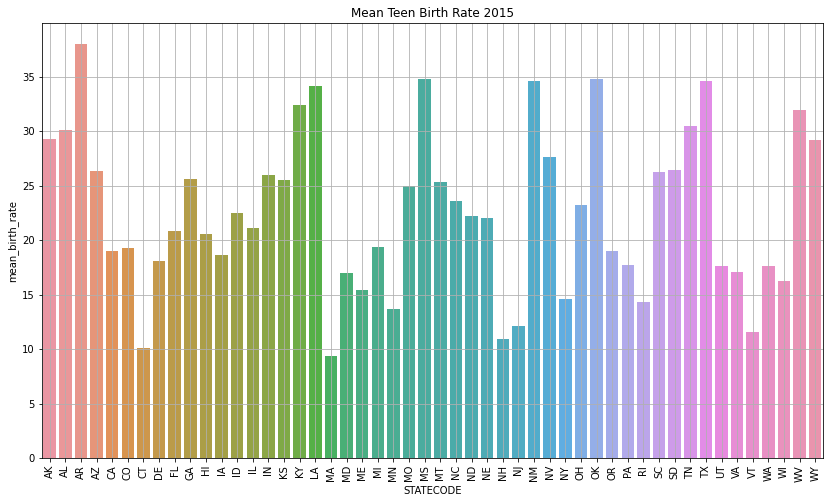

In [94]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2015.STATECODE, y = TeenBirthRates2015.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2015')
plt.show()

In [95]:
TeenBirthRates2015['STATE'] = TeenBirthRates2015['STATECODE'].map(state_abbreviations)
TeenBirthRates2015

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,29.3,29.3,29.3,ALASKA
1,AL,30.1,30.1,30.1,ALABAMA
2,AR,38.0,38.0,38.0,ARKANSAS
3,AZ,26.3,26.3,26.3,ARIZONA
4,CA,19.0,19.0,19.0,CALIFORNIA
5,CO,19.3,19.3,19.3,COLORADO
6,CT,10.1,10.1,10.1,CONNECTICUT
7,DE,18.1,18.1,18.1,DELAWARE
8,FL,20.8,20.8,20.8,FLORIDA
9,GA,25.6,25.6,25.6,GEORGIA


In [96]:
fig = px.choropleth(TeenBirthRates2015,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [97]:
TeenBirthRates2016 = TeenBirthRates[TeenBirthRates.YEAR == 2016]
TeenBirthRates2016

,YEAR,STATECODE,RATE
200,2016,AL,28.4
201,2016,AK,25.8
202,2016,AZ,23.6
203,2016,AR,34.6
204,2016,CA,17.0
205,2016,CO,17.8
206,2016,CT,9.4
207,2016,DE,19.5
208,2016,FL,19.3
209,2016,GA,23.6


In [98]:
TeenBirthRates2016 = TeenBirthRates2016.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2016

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,25.8,25.8,25.8
1,AL,28.4,28.4,28.4
2,AR,34.6,34.6,34.6
3,AZ,23.6,23.6,23.6
4,CA,17.0,17.0,17.0
5,CO,17.8,17.8,17.8
6,CT,9.4,9.4,9.4
7,DE,19.5,19.5,19.5
8,FL,19.3,19.3,19.3
9,GA,23.6,23.6,23.6


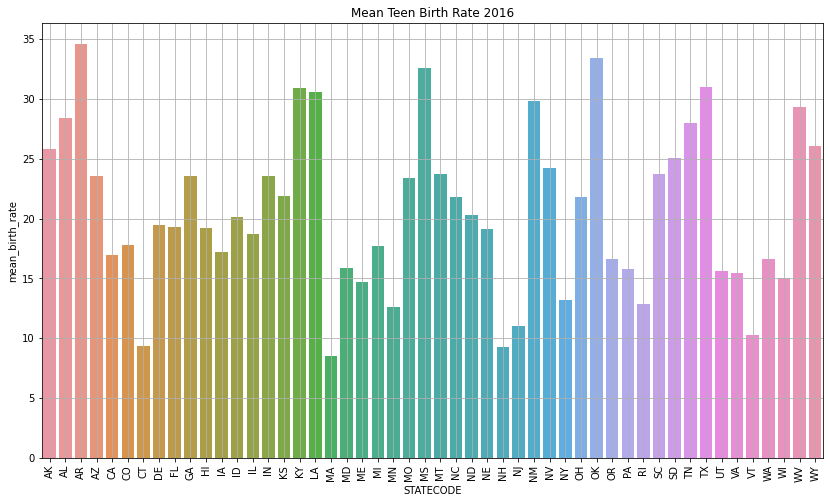

In [99]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2016.STATECODE, y = TeenBirthRates2016.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2016')
plt.show()

In [100]:
TeenBirthRates2016['STATE'] = TeenBirthRates2016['STATECODE'].map(state_abbreviations)
TeenBirthRates2016

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,25.8,25.8,25.8,ALASKA
1,AL,28.4,28.4,28.4,ALABAMA
2,AR,34.6,34.6,34.6,ARKANSAS
3,AZ,23.6,23.6,23.6,ARIZONA
4,CA,17.0,17.0,17.0,CALIFORNIA
5,CO,17.8,17.8,17.8,COLORADO
6,CT,9.4,9.4,9.4,CONNECTICUT
7,DE,19.5,19.5,19.5,DELAWARE
8,FL,19.3,19.3,19.3,FLORIDA
9,GA,23.6,23.6,23.6,GEORGIA


In [101]:
fig = px.choropleth(TeenBirthRates2016,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [102]:
TeenBirthRates2017 = TeenBirthRates[TeenBirthRates.YEAR == 2017]
TeenBirthRates2017

,YEAR,STATECODE,RATE
150,2017,AL,27.0
151,2017,AK,22.0
152,2017,AZ,22.0
153,2017,AR,32.8
154,2017,CA,15.1
155,2017,CO,16.1
156,2017,CT,8.8
157,2017,DE,18.5
158,2017,FL,18.2
159,2017,GA,21.9


In [103]:
TeenBirthRates2017 = TeenBirthRates2017.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2017

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,22.0,22.0,22.0
1,AL,27.0,27.0,27.0
2,AR,32.8,32.8,32.8
3,AZ,22.0,22.0,22.0
4,CA,15.1,15.1,15.1
5,CO,16.1,16.1,16.1
6,CT,8.8,8.8,8.8
7,DE,18.5,18.5,18.5
8,FL,18.2,18.2,18.2
9,GA,21.9,21.9,21.9


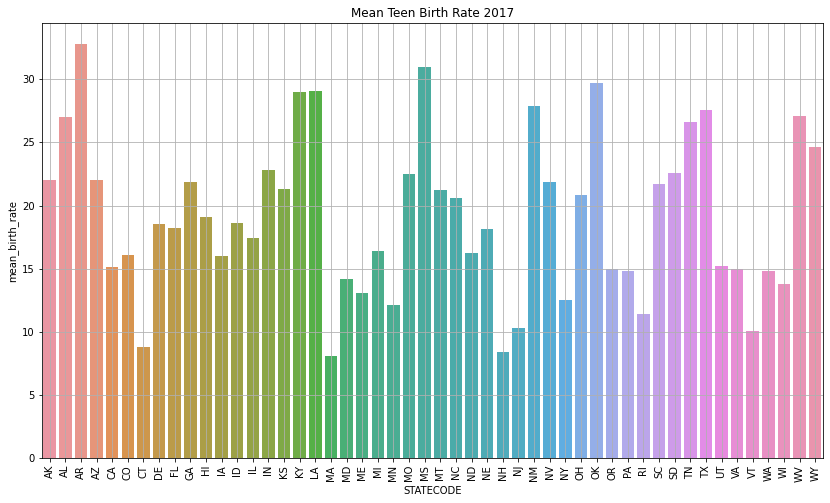

In [104]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2017.STATECODE, y = TeenBirthRates2017.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2017')
plt.show()

In [105]:
TeenBirthRates2017['STATE'] = TeenBirthRates2017['STATECODE'].map(state_abbreviations)
TeenBirthRates2017

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,22.0,22.0,22.0,ALASKA
1,AL,27.0,27.0,27.0,ALABAMA
2,AR,32.8,32.8,32.8,ARKANSAS
3,AZ,22.0,22.0,22.0,ARIZONA
4,CA,15.1,15.1,15.1,CALIFORNIA
5,CO,16.1,16.1,16.1,COLORADO
6,CT,8.8,8.8,8.8,CONNECTICUT
7,DE,18.5,18.5,18.5,DELAWARE
8,FL,18.2,18.2,18.2,FLORIDA
9,GA,21.9,21.9,21.9,GEORGIA


In [106]:
fig = px.choropleth(TeenBirthRates2017,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [107]:
TeenBirthRates2018 = TeenBirthRates[TeenBirthRates.YEAR == 2018]
TeenBirthRates2018

,YEAR,STATECODE,RATE
100,2018,AL,25.2
101,2018,AK,19.3
102,2018,AZ,20.1
103,2018,AR,30.4
104,2018,CA,13.6
105,2018,CO,14.3
106,2018,CT,8.3
107,2018,DE,16.7
108,2018,FL,16.7
109,2018,GA,20.6


In [108]:
TeenBirthRates2018 = TeenBirthRates2018.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2018

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,19.3,19.3,19.3
1,AL,25.2,25.2,25.2
2,AR,30.4,30.4,30.4
3,AZ,20.1,20.1,20.1
4,CA,13.6,13.6,13.6
5,CO,14.3,14.3,14.3
6,CT,8.3,8.3,8.3
7,DE,16.7,16.7,16.7
8,FL,16.7,16.7,16.7
9,GA,20.6,20.6,20.6


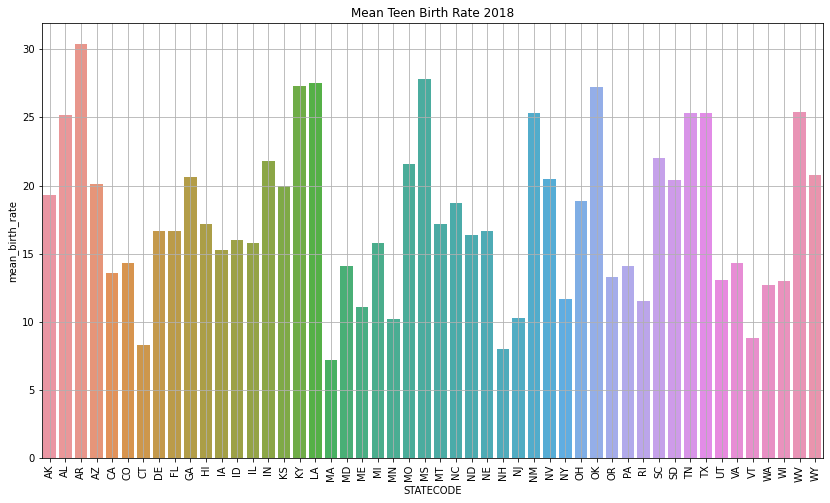

In [109]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2018.STATECODE, y = TeenBirthRates2018.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2018')
plt.show()

In [110]:
TeenBirthRates2018['STATE'] = TeenBirthRates2018['STATECODE'].map(state_abbreviations)
TeenBirthRates2018

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,19.3,19.3,19.3,ALASKA
1,AL,25.2,25.2,25.2,ALABAMA
2,AR,30.4,30.4,30.4,ARKANSAS
3,AZ,20.1,20.1,20.1,ARIZONA
4,CA,13.6,13.6,13.6,CALIFORNIA
5,CO,14.3,14.3,14.3,COLORADO
6,CT,8.3,8.3,8.3,CONNECTICUT
7,DE,16.7,16.7,16.7,DELAWARE
8,FL,16.7,16.7,16.7,FLORIDA
9,GA,20.6,20.6,20.6,GEORGIA


In [111]:
fig = px.choropleth(TeenBirthRates2018,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [112]:
TeenBirthRates2019 = TeenBirthRates[TeenBirthRates.YEAR == 2019]
TeenBirthRates2019

,YEAR,STATECODE,RATE
50,2019,AL,25.6
51,2019,AK,18.3
52,2019,AZ,18.5
53,2019,AR,30.0
54,2019,CA,12.4
55,2019,CO,13.9
56,2019,CT,7.7
57,2019,DE,14.9
58,2019,FL,16.2
59,2019,GA,19.7


In [113]:
TeenBirthRates2019 = TeenBirthRates2019.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2019

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,18.3,18.3,18.3
1,AL,25.6,25.6,25.6
2,AR,30.0,30.0,30.0
3,AZ,18.5,18.5,18.5
4,CA,12.4,12.4,12.4
5,CO,13.9,13.9,13.9
6,CT,7.7,7.7,7.7
7,DE,14.9,14.9,14.9
8,FL,16.2,16.2,16.2
9,GA,19.7,19.7,19.7


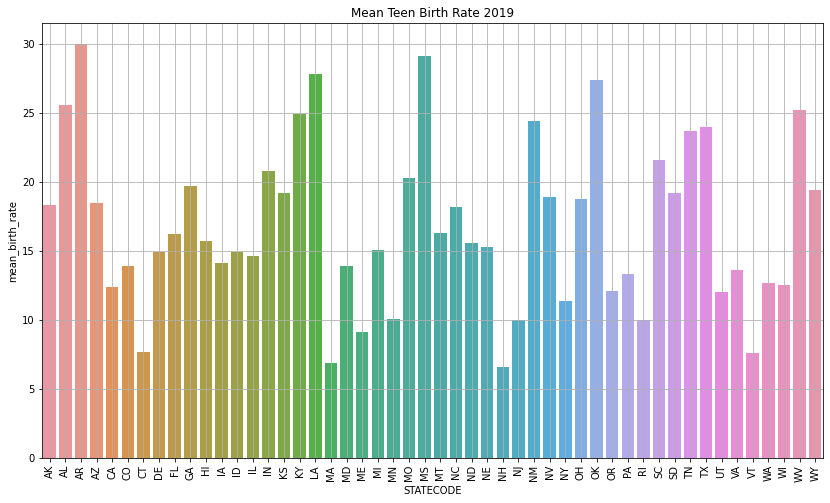

In [114]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2019.STATECODE, y = TeenBirthRates2019.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2019')
plt.show()

In [115]:
TeenBirthRates2019['STATE'] = TeenBirthRates2019['STATECODE'].map(state_abbreviations)
TeenBirthRates2019

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,18.3,18.3,18.3,ALASKA
1,AL,25.6,25.6,25.6,ALABAMA
2,AR,30.0,30.0,30.0,ARKANSAS
3,AZ,18.5,18.5,18.5,ARIZONA
4,CA,12.4,12.4,12.4,CALIFORNIA
5,CO,13.9,13.9,13.9,COLORADO
6,CT,7.7,7.7,7.7,CONNECTICUT
7,DE,14.9,14.9,14.9,DELAWARE
8,FL,16.2,16.2,16.2,FLORIDA
9,GA,19.7,19.7,19.7,GEORGIA


In [116]:
fig = px.choropleth(TeenBirthRates2019,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [117]:
TeenBirthRates2020 = TeenBirthRates[TeenBirthRates.YEAR == 2020]
TeenBirthRates2020

,YEAR,STATECODE,RATE
0,2020,AL,24.8
1,2020,AK,17.7
2,2020,AZ,16.6
3,2020,AR,27.8
4,2020,CA,11.0
5,2020,CO,12.5
6,2020,CT,7.6
7,2020,DE,14.6
8,2020,FL,15.2
9,2020,GA,18.2


In [118]:
TeenBirthRates2020 = TeenBirthRates2020.groupby('STATECODE', as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates2020

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,AK,17.7,17.7,17.7
1,AL,24.8,24.8,24.8
2,AR,27.8,27.8,27.8
3,AZ,16.6,16.6,16.6
4,CA,11.0,11.0,11.0
5,CO,12.5,12.5,12.5
6,CT,7.6,7.6,7.6
7,DE,14.6,14.6,14.6
8,FL,15.2,15.2,15.2
9,GA,18.2,18.2,18.2


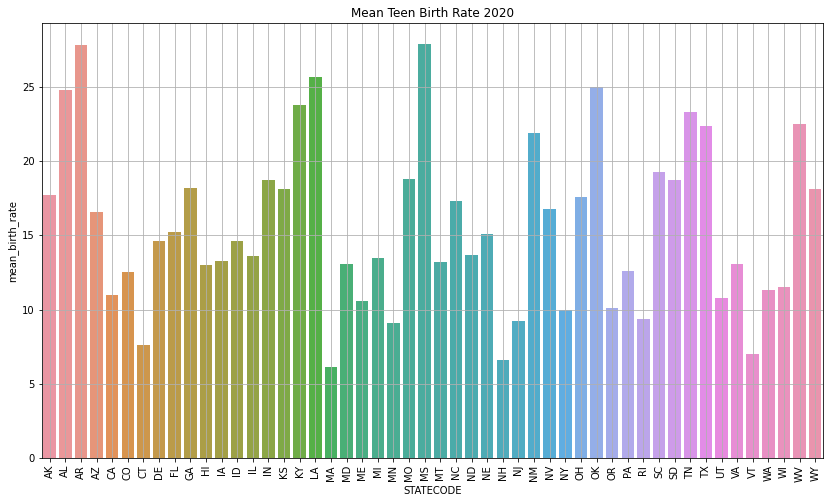

In [119]:
plt.figure(figsize=(14,8))
sns.barplot(x = TeenBirthRates2020.STATECODE, y = TeenBirthRates2020.mean_birth_rate)
plt.xticks(rotation=90)
plt.grid()
plt.title('Mean Teen Birth Rate 2020')
plt.show()

In [120]:
TeenBirthRates2020['STATE'] = TeenBirthRates2020['STATECODE'].map(state_abbreviations)
TeenBirthRates2020

,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate,STATE
0,AK,17.7,17.7,17.7,ALASKA
1,AL,24.8,24.8,24.8,ALABAMA
2,AR,27.8,27.8,27.8,ARKANSAS
3,AZ,16.6,16.6,16.6,ARIZONA
4,CA,11.0,11.0,11.0,CALIFORNIA
5,CO,12.5,12.5,12.5,COLORADO
6,CT,7.6,7.6,7.6,CONNECTICUT
7,DE,14.6,14.6,14.6,DELAWARE
8,FL,15.2,15.2,15.2,FLORIDA
9,GA,18.2,18.2,18.2,GEORGIA


In [121]:
fig = px.choropleth(TeenBirthRates2020,
                    locationmode='USA-states',
                    scope='usa',
                    locations='STATECODE',
                    color='mean_birth_rate',
                    hover_name='STATE',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Trend over time by state (2014-2020)

In [122]:
TeenBirthRates = TeenBirthRates.groupby(['YEAR','STATECODE'], as_index=False).agg(
    min_birth_rate = pd.NamedAgg(column='RATE', aggfunc=min),
    max_birth_rate = pd.NamedAgg(column='RATE', aggfunc=max),
    mean_birth_rate = pd.NamedAgg(column='RATE', aggfunc=np.mean))

TeenBirthRates

,YEAR,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
0,2014,AK,27.8,27.8,27.8
1,2014,AL,32.0,32.0,32.0
2,2014,AR,39.5,39.5,39.5
3,2014,AZ,29.9,29.9,29.9
4,2014,CA,21.1,21.1,21.1
...,...,...,...,...,...
345,2020,VT,7.0,7.0,7.0
346,2020,WA,11.3,11.3,11.3
347,2020,WI,11.5,11.5,11.5
348,2020,WV,22.5,22.5,22.5


### Select a specific state 

In [123]:
select_state='AR'
TeenBirthRates_by_State = TeenBirthRates[TeenBirthRates.STATECODE==select_state]
TeenBirthRates_by_State

,YEAR,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
2,2014,AR,39.5,39.5,39.5
52,2015,AR,38.0,38.0,38.0
102,2016,AR,34.6,34.6,34.6
152,2017,AR,32.8,32.8,32.8
202,2018,AR,30.4,30.4,30.4
252,2019,AR,30.0,30.0,30.0
302,2020,AR,27.8,27.8,27.8


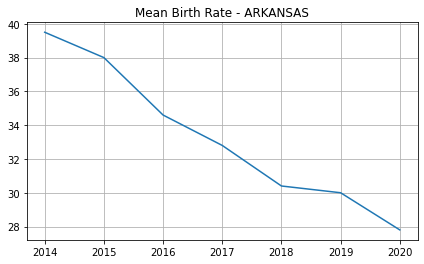

In [124]:
plt.figure(figsize=(7,4))
plt.plot(TeenBirthRates_by_State.YEAR, TeenBirthRates_by_State.mean_birth_rate)
plt.grid()
plt.title('Mean Birth Rate - ARKANSAS')
plt.show()

### Select another State

In [126]:
select_state='MA'
TeenBirthRates_by_State = TeenBirthRates[TeenBirthRates.STATECODE==select_state]
TeenBirthRates_by_State

,YEAR,STATECODE,min_birth_rate,max_birth_rate,mean_birth_rate
18,2014,MA,10.6,10.6,10.6
68,2015,MA,9.4,9.4,9.4
118,2016,MA,8.5,8.5,8.5
168,2017,MA,8.1,8.1,8.1
218,2018,MA,7.2,7.2,7.2
268,2019,MA,6.9,6.9,6.9
318,2020,MA,6.1,6.1,6.1


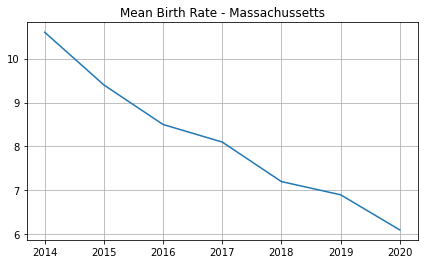

In [128]:
plt.figure(figsize=(7,4))
plt.plot(TeenBirthRates_by_State.YEAR, TeenBirthRates_by_State.mean_birth_rate)
plt.grid()
plt.title('Mean Birth Rate - Massachusetts')
plt.show()

### Select all states

/Users/lucythuku/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



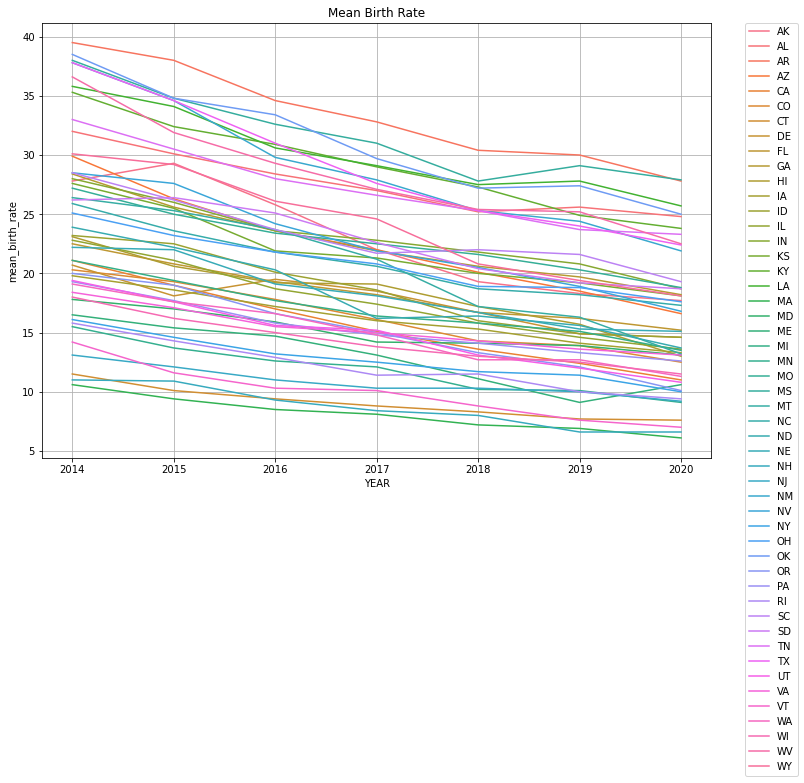

In [57]:
plt.figure(figsize=(12,8))
sns.lineplot('YEAR','mean_birth_rate', hue='STATECODE', data=TeenBirthRates)
plt.grid()
plt.title('Mean Birth Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<AxesSubplot:>

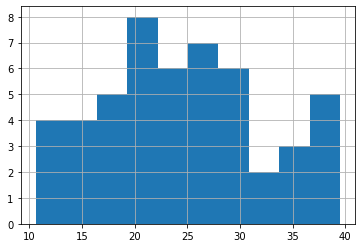

In [70]:
TeenBirthRates2014['mean_birth_rate'].hist()


<AxesSubplot:>

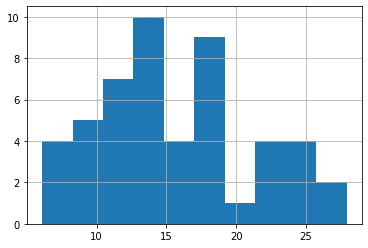

In [71]:
TeenBirthRates2020['mean_birth_rate'].hist()

In [72]:
stats.ttest_rel(TeenBirthRates2014['mean_birth_rate'],TeenBirthRates2020['mean_birth_rate'])

Ttest_relResult(statistic=21.300954057125114, pvalue=2.0094058825377888e-26)